# Assignment 2

### 1. Import Libraries and Data:

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv("HousingData.csv")

### 2. Exploratory Data Analysis:

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [8]:
# I cannot remember which feature is which, so I am renaming them for additional context
column_mapping = {
    "CRIM": "crime_rate",
    "ZN": "residential_land",
    "INDUS": "business_land",
    "CHAS": "by_river",
    "NOX": "nox_concentration",
    "RM": "avg_rooms",
    "AGE": "old_homes",
    "DIS": "job_distance",
    "RAD": "highway_access",
    "TAX": "property_tax",
    "PTRATIO": "student_teacher_ratio",
    "B": "black_population",
    "LSTAT": "low_status_pct",
    "MEDV": "median_value"
}

df = df.rename(columns=column_mapping)


In [22]:
# Getting a sense of the rows and columns
df.shape

(506, 14)

In [9]:
# Getting a sense of the data within the columns
df.describe()

,crime_rate,residential_land,business_land,by_river,nox_concentration,avg_rooms,old_homes,job_distance,highway_access,property_tax,student_teacher_ratio,black_population,low_status_pct,median_value
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
# Understanding the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   crime_rate             486 non-null    float64
 1   residential_land       486 non-null    float64
 2   business_land          486 non-null    float64
 3   by_river               486 non-null    float64
 4   nox_concentration      506 non-null    float64
 5   avg_rooms              506 non-null    float64
 6   old_homes              486 non-null    float64
 7   job_distance           506 non-null    float64
 8   highway_access         506 non-null    int64  
 9   property_tax           506 non-null    int64  
 10  student_teacher_ratio  506 non-null    float64
 11  black_population       506 non-null    float64
 12  low_status_pct         486 non-null    float64
 13  median_value           506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


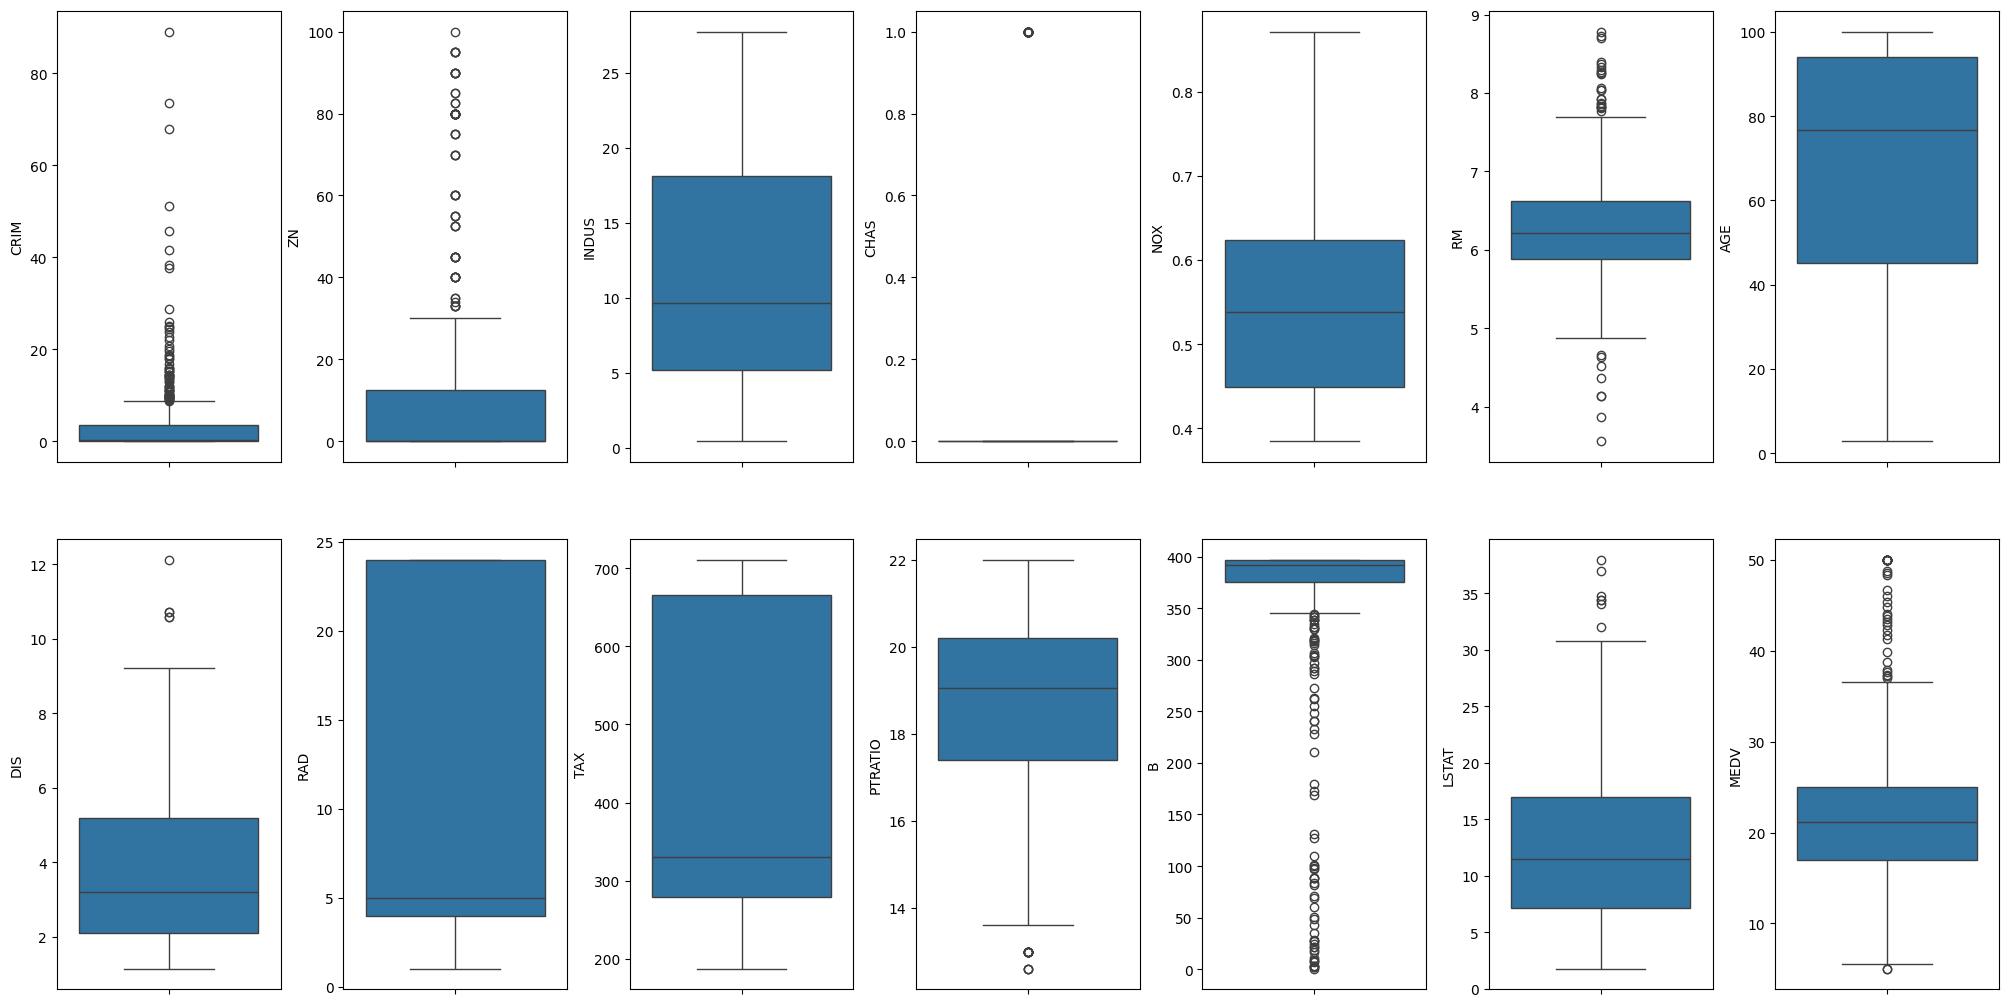

In [28]:
# Plotting the distributions of the features 

fig, axis = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
idx = 0
axis = axis.flatten()
for key, val in df.items():
    sns.boxplot(y=key, data=df, ax=axis[idx])
    idx += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

<Axes: >

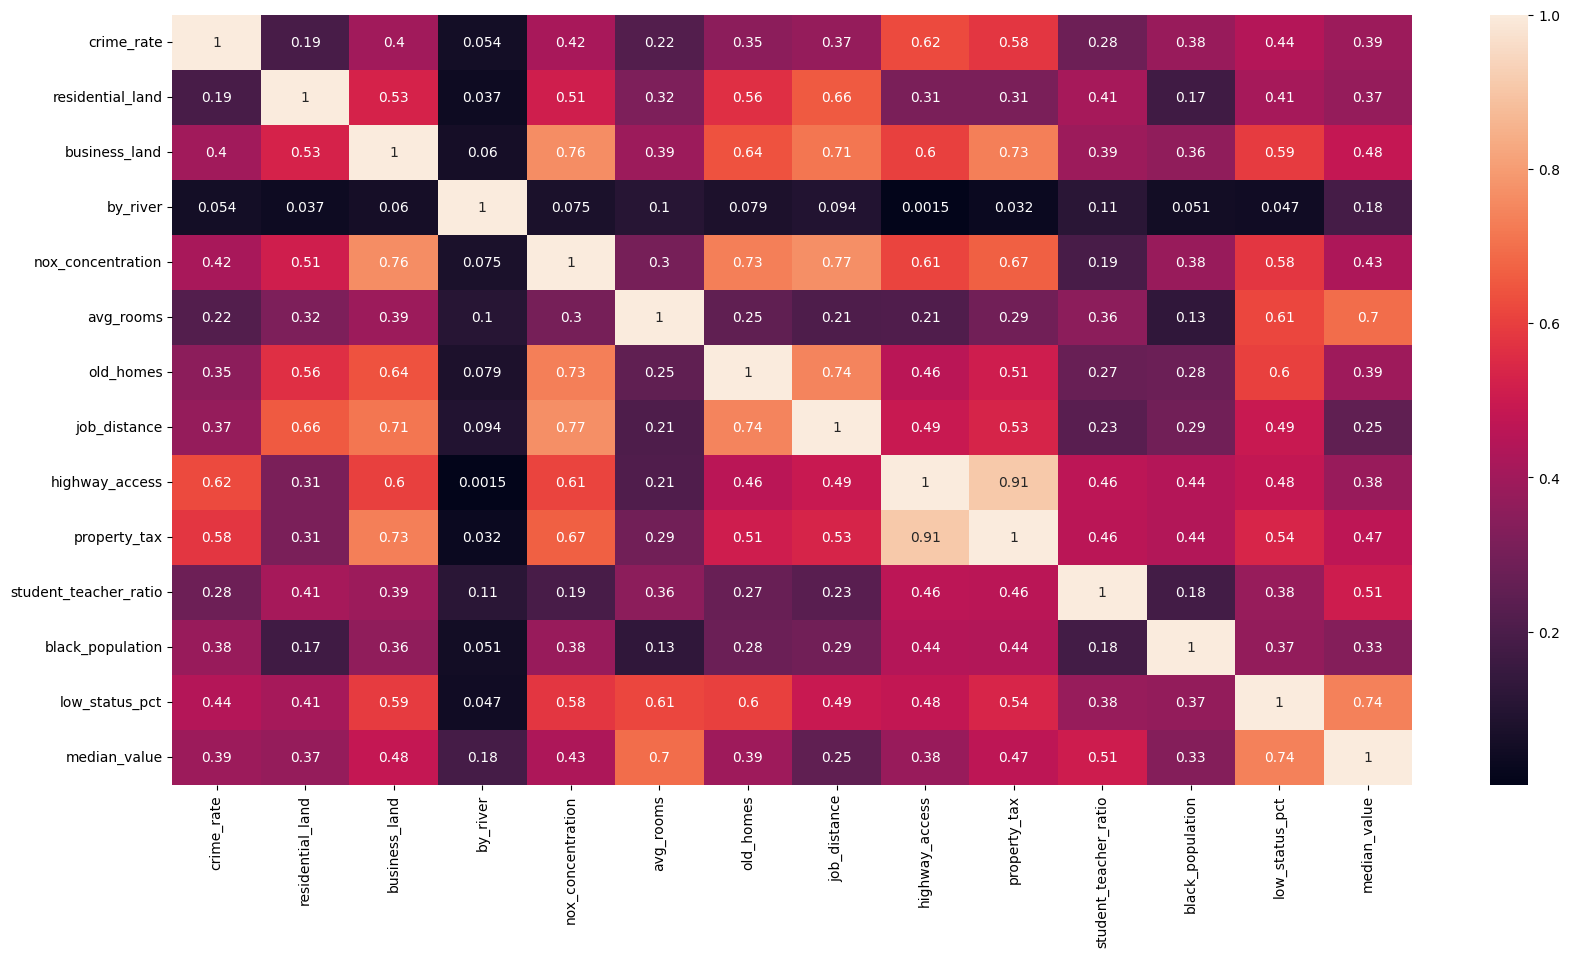

In [13]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True)

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.decomposition import PCA
import numpy as np

class BostonHousingEDA:
    def __init__(self, data):
        """
        Initializes the EDA class with the data for boston housing
        """
        
        # set attributes
        self.data = data
        self.scaled_data = None
        self.cleaned_data = None
        self.column_mapping = {
            "CRIM": "crime_rate",
            "ZN": "residential_land",
            "INDUS": "business_land",
            "CHAS": "by_river",
            "NOX": "nox_concentration",
            "RM": "avg_rooms",
            "AGE": "old_homes",
            "DIS": "job_distance",
            "RAD": "highway_access",
            "TAX": "property_tax",
            "PTRATIO": "student_teacher_ratio",
            "B": "black_population",
            "LSTAT": "low_status_pct",
            "MEDV": "median_value"
        }
        self.data = self.data.rename(columns=self.column_mapping)

    def handle_missing_values(self, strategy="mean"):
        """
        Handles missing values in the dataset with three methods
        """
        if strategy == "mean":
            self.data.fillna(self.data.mean(), inplace=True)
        elif strategy == "median":
            self.data.fillna(self.data.median(), inplace=True)
        elif strategy == "drop":
            self.data.dropna(inplace=True)
        else:
            raise ValueError("Error. Select value")

    def visualize_data_distribution(self):
        """
        Visualize the distribution of all features in the dataset to get a sense of shape
        """
        # Craete the fig
        plt.figure(figsize=(20, 15))
        
        # Iterate over the columns and plot each
        for i, col in enumerate(self.data.columns, 1):
            # crate a subplot
            plt.subplot(4, 4, i)
            # Plot the histplot
            sns.histplot(self.data[col], kde=True, bins=30)
            plt.title(f'Distribution of {col}')
        plt.tight_layout()
        plt.show()

    def visualize_correlation_matrix(self):
        """
        Plot the correlation matrix
        """
        # Get correlation
        corr_matrix = self.data.corr()
        # create fig
        plt.figure(figsize=(12, 8))
        # create heatmap
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
        plt.title('Correlation Matrix')
        plt.show()

    def handle_multicollinearity(self, threshold=0.75):
        """
        Identify highly correlated features with threshold
        """
        # Get correatlion
        corr_matrix = self.data.corr().abs()
        
        # Find columns with correlation above the threshold
        upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
        
        # Drop cols
        self.cleaned_data = self.data.drop(columns=to_drop)
        
        print(f"cols we drop for multicollinearity: {to_drop}")
        print(f"Remaining cols: {self.cleaned_data.columns.tolist()}")
        
        return self.cleaned_data

    def scale_data(self, method='standard'):
        """
        Scale the data using the selected method.
        """
        
        # Select method based on input
        if method == 'standard':
            scaler = StandardScaler()
        elif method == 'minmax':
            scaler = MinMaxScaler()
        elif method == 'power':
            scaler = PowerTransformer()
        else:
            raise ValueError("Error. Pick one")

        # Use cleaned data
        data_to_scale = self.cleaned_data if self.cleaned_data is not None else self.data
        self.scaled_data = pd.DataFrame(scaler.fit_transform(data_to_scale), columns=data_to_scale.columns)
        return self.scaled_data

    def pca_visualization(self, n_components=2):
        """
        Apply the PCA algo to visualize the data
        """
        
        # Check for scaled data
        if self.scaled_data is None:
            print("Please scale the data first.")
            return
        
        # apply pca
        pca = PCA(n_components=n_components)
        pca_components = pca.fit_transform(self.scaled_data)

        # plot results
        plt.figure(figsize=(8, 6))
        plt.scatter(pca_components[:, 0], pca_components[:, 1], c=self.data['median_value'], cmap='viridis')
        plt.colorbar(label='Median Value')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.title('PCA Visualization (2 components)')
        plt.show()

    def summarize_data(self):
        """
        Summarise data
        """
        print(self.data.describe())



In [46]:
# Load the dataset
df = pd.read_csv("HousingData.csv")


In [47]:
# Initialize the EDA class 
eda = BostonHousingEDA(df)

# Handle missing values
eda.handle_missing_values(strategy='mean')


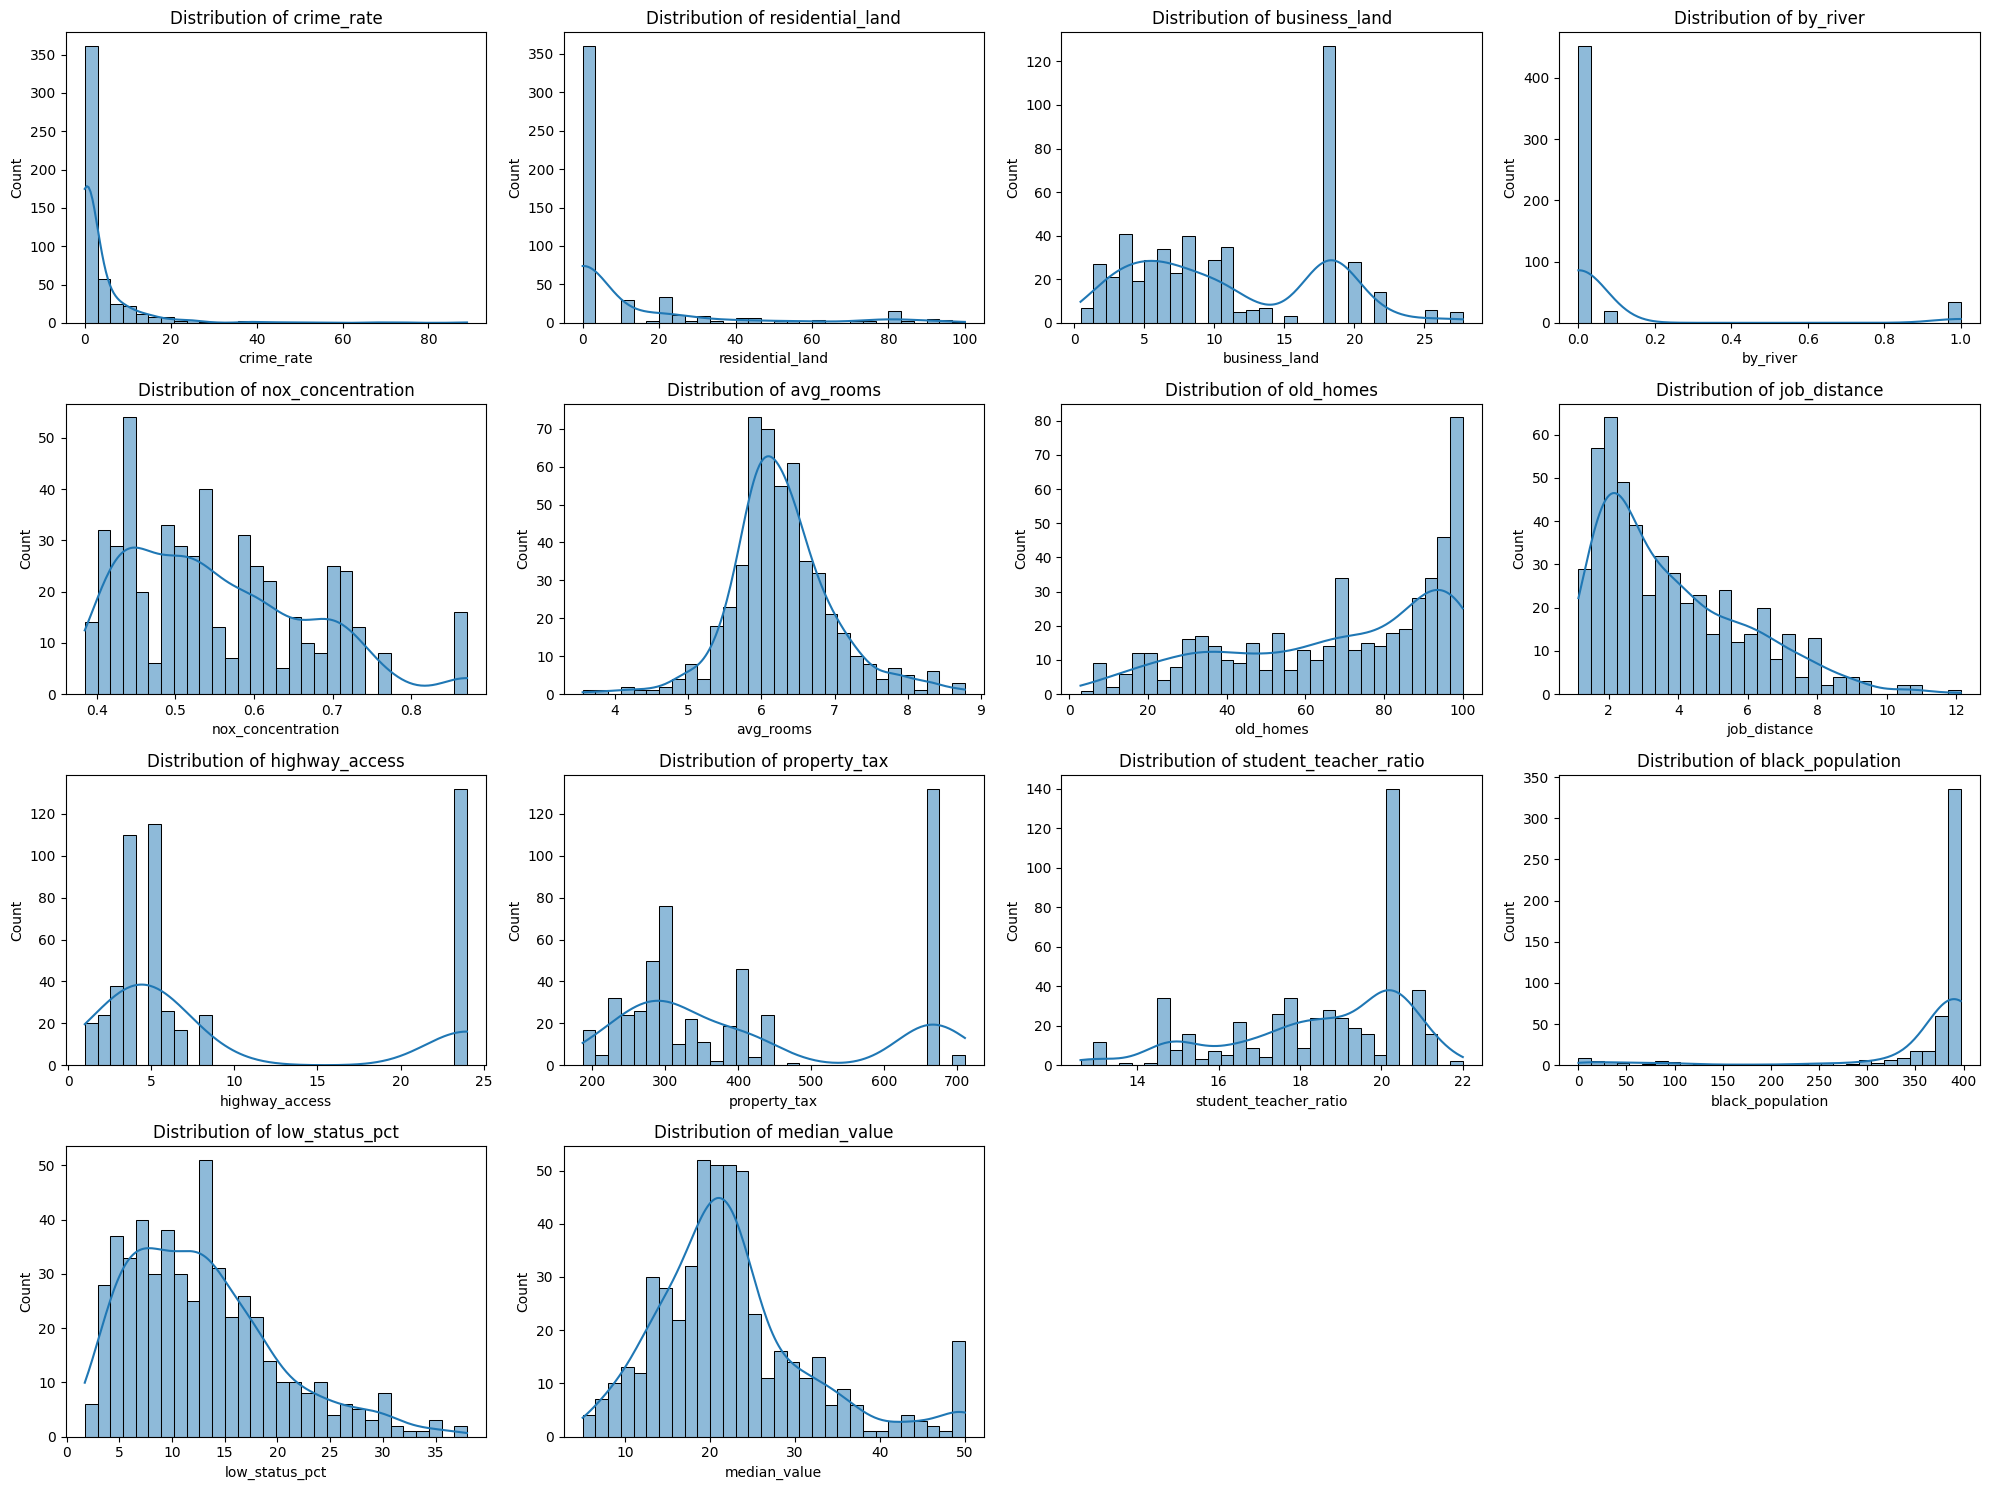

In [48]:
# Visualize the data distribution
eda.visualize_data_distribution()


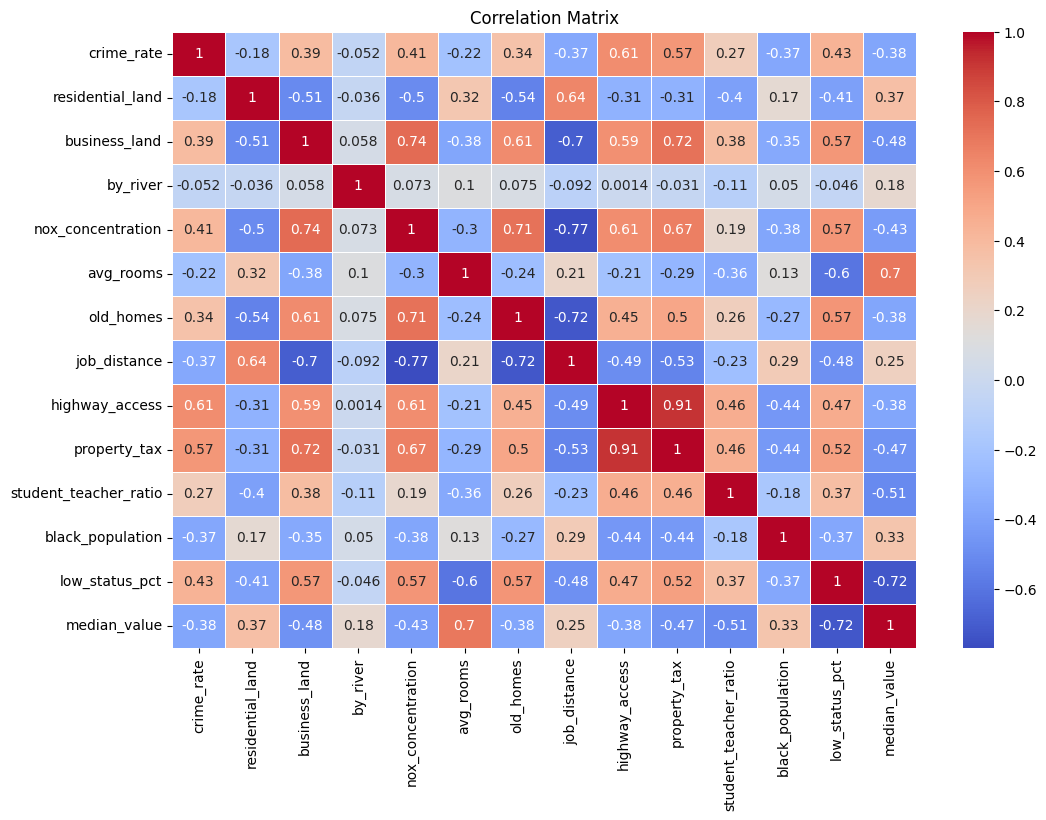

In [49]:
# Visualize the correlation matrix
eda.visualize_correlation_matrix()

In [50]:
# Handle multicollinearity
new_df = eda.handle_multicollinearity(threshold=0.70)

print(new_df.head())



cols we drop for multicollinearity: ['nox_concentration', 'old_homes', 'job_distance', 'property_tax', 'median_value']
Remaining cols: ['crime_rate', 'residential_land', 'business_land', 'by_river', 'avg_rooms', 'highway_access', 'student_teacher_ratio', 'black_population', 'low_status_pct']
   crime_rate  residential_land  business_land  by_river  avg_rooms  \
0     0.00632              18.0           2.31       0.0      6.575   
1     0.02731               0.0           7.07       0.0      6.421   
2     0.02729               0.0           7.07       0.0      7.185   
3     0.03237               0.0           2.18       0.0      6.998   
4     0.06905               0.0           2.18       0.0      7.147   

   highway_access  student_teacher_ratio  black_population  low_status_pct  
0               1                   15.3            396.90        4.980000  
1               2                   17.8            396.90        9.140000  
2               2                   17.8         

In [51]:
# sxcale data
eda.scale_data(method='standard')


,crime_rate,residential_land,business_land,by_river,avg_rooms,highway_access,student_teacher_ratio,black_population,low_status_pct
0,-0.422328,0.296443,-1.311010,-0.279851,0.413672,-0.982843,-1.459000,0.441052,-1.104146
1,-0.419870,-0.489639,-0.599771,-0.279851,0.194274,-0.867883,-0.303094,0.441052,-0.510353
2,-0.419872,-0.489639,-0.599771,-0.279851,1.282714,-0.867883,-0.303094,0.396427,-1.239748
3,-0.419277,-0.489639,-1.330435,-0.279851,1.016303,-0.752922,0.113032,0.416163,-1.395333
4,-0.414981,-0.489639,-1.330435,-0.279851,1.228577,-0.752922,0.113032,0.441052,0.000000
...,...,...,...,...,...,...,...,...,...
501,-0.415733,-0.489639,0.126411,-0.279851,0.439316,-0.982843,1.176466,0.387217,0.000000
502,-0.417766,-0.489639,0.126411,-0.279851,-0.234548,-0.982843,1.176466,0.441052,-0.518917
503,-0.415952,-0.489639,0.126411,-0.279851,0.984960,-0.982843,1.176466,0.441052,-1.009938
504,-0.410232,-0.489639,0.126411,-0.279851,0.725672,-0.982843,1.176466,0.403225,-0.890038


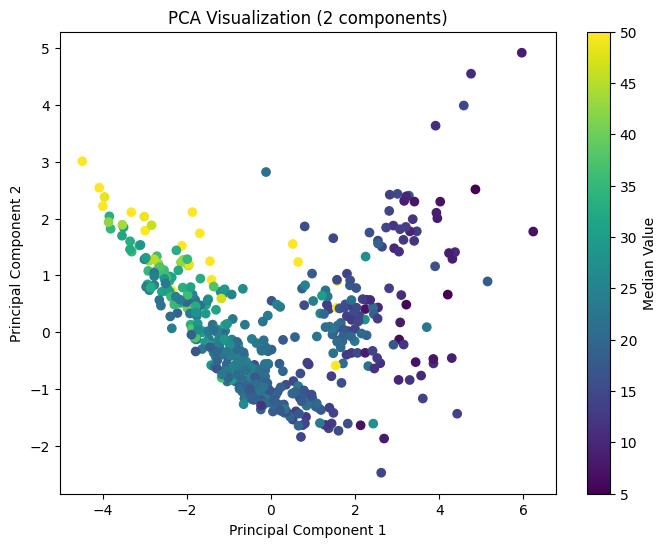

In [52]:
# visualize again
eda.pca_visualization(n_components=2)

In [53]:
# describe
eda.summarize_data()

       crime_rate  residential_land  business_land    by_river  \
count  506.000000        506.000000     506.000000  506.000000   
mean     3.611874         11.211934      11.083992    0.069959   
std      8.545770         22.921051       6.699165    0.250233   
min      0.006320          0.000000       0.460000    0.000000   
25%      0.083235          0.000000       5.190000    0.000000   
50%      0.290250          0.000000       9.900000    0.000000   
75%      3.611874         11.211934      18.100000    0.000000   
max     88.976200        100.000000      27.740000    1.000000   

       nox_concentration   avg_rooms   old_homes  job_distance  \
count         506.000000  506.000000  506.000000    506.000000   
mean            0.554695    6.284634   68.518519      3.795043   
std             0.115878    0.702617   27.439466      2.105710   
min             0.385000    3.561000    2.900000      1.129600   
25%             0.449000    5.885500   45.925000      2.100175   
50%      

In [54]:
new_df.head()

,crime_rate,residential_land,business_land,by_river,avg_rooms,highway_access,student_teacher_ratio,black_population,low_status_pct
0,0.00632,18.0,2.31,0.0,6.575,1,15.3,396.90,4.980000
1,0.02731,0.0,7.07,0.0,6.421,2,17.8,396.90,9.140000
2,0.02729,0.0,7.07,0.0,7.185,2,17.8,392.83,4.030000
3,0.03237,0.0,2.18,0.0,6.998,3,18.7,394.63,2.940000
4,0.06905,0.0,2.18,0.0,7.147,3,18.7,396.90,12.715432


In [44]:
new_df.shape

(506, 9)

### 3. Linear Regression